In [37]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

db = client.australia_fire_db
historicalFires = db.historicalFires.find()
temp_rainfall = db.temp_rainfall.find()

In [3]:
temp_rain_data = []
for data in temp_rainfall:
    temp_rain_data.append(data)
    
temp_rain_data

[{'_id': ObjectId('5e97bcad58bea3c2bc94d35e'),
  'Year': 1956,
  'Avg Annual Temp': 23.21666666666667,
  'Avg Annual Rainfall': 1337.3833333333334,
  'temp_differnce': -0.4770977675134844,
  'rainfall_difference': 396.948520249221},
 {'_id': ObjectId('5e97bcad58bea3c2bc94d35f'),
  'Year': 1957,
  'Avg Annual Temp': 23.916666666666668,
  'Avg Annual Rainfall': 845.9499999999999,
  'temp_differnce': 0.22290223248651486,
  'rainfall_difference': -94.48481308411249},
 {'_id': ObjectId('5e97bcad58bea3c2bc94d360'),
  'Year': 1958,
  'Avg Annual Temp': 23.86666666666667,
  'Avg Annual Rainfall': 1000.8833333333333,
  'temp_differnce': 0.1729022324865177,
  'rainfall_difference': 60.448520249220905},
 {'_id': ObjectId('5e97bcad58bea3c2bc94d361'),
  'Year': 1959,
  'Avg Annual Temp': 23.849999999999998,
  'Avg Annual Rainfall': 957.7166666666666,
  'temp_differnce': 0.15623556581984488,
  'rainfall_difference': 17.281853582554163},
 {'_id': ObjectId('5e97bcad58bea3c2bc94d362'),
  'Year': 1960,


In [4]:
docs = pd.DataFrame(columns=[])
for num, doc in enumerate( temp_rain_data ):
    # convert ObjectId() to str 
    doc["_id"] = str(doc["_id"]) 

    # get document _id from dict 
    doc_id = doc["_id"]
    
    # create a Series obj from the MongoDB dict 
    series_obj = pd.Series( doc, name=doc_id ) 

    # append the MongoDB Series obj to the DataFrame obj 
    docs = docs.append( series_obj )
    
temp_rain_df = docs.copy()
temp_rain_df

,Avg Annual Rainfall,Avg Annual Temp,Year,_id,rainfall_difference,temp_differnce
5e97bcad58bea3c2bc94d35e,1337.383333,23.216667,1956.0,5e97bcad58bea3c2bc94d35e,396.948520,-0.477098
5e97bcad58bea3c2bc94d35f,845.950000,23.916667,1957.0,5e97bcad58bea3c2bc94d35f,-94.484813,0.222902
5e97bcad58bea3c2bc94d360,1000.883333,23.866667,1958.0,5e97bcad58bea3c2bc94d360,60.448520,0.172902
5e97bcad58bea3c2bc94d361,957.716667,23.850000,1959.0,5e97bcad58bea3c2bc94d361,17.281854,0.156236
5e97bcad58bea3c2bc94d362,977.316667,23.366667,1960.0,5e97bcad58bea3c2bc94d362,36.881854,-0.327098
...,...,...,...,...,...,...
5e97bcad58bea3c2bc94d399,892.000000,24.242857,2015.0,5e97bcad58bea3c2bc94d399,-48.434813,0.549093
5e97bcad58bea3c2bc94d39a,918.028571,24.271429,2016.0,5e97bcad58bea3c2bc94d39a,-22.406242,0.577664
5e97bcad58bea3c2bc94d39b,871.880000,24.542857,2017.0,5e97bcad58bea3c2bc94d39b,-68.554813,0.849093
5e97bcad58bea3c2bc94d39c,838.450000,24.471429,2018.0,5e97bcad58bea3c2bc94d39c,-101.984813,0.777664


In [5]:
temp_rain_df = temp_rain_df.astype({"Year": "int"})
temp_rain_df.dtypes

Avg Annual Rainfall    float64
Avg Annual Temp        float64
Year                     int64
_id                     object
rainfall_difference    float64
temp_differnce         float64
dtype: object

In [6]:
historical_data = []
for data in historicalFires:
    historical_data.append(data)
    
historical_data

[{'_id': ObjectId('5e9107520b83894bd178f7da'),
  'Date': '6 February 1851',
  'Name': 'Black Thursday bushfires',
  'State(s)/territories': 'Victoria',
  'AreaBurned(ha)': 5000000,
  'AreaBurned(acres)': 12000000,
  'Fatalities': 12,
  'PropertiesDamaged(HomesDestroyed)': 0,
  'Year': 1851},
 {'_id': ObjectId('5e9107520b83894bd178f7db'),
  'Date': '1 February 1898',
  'Name': 'Red Tuesday bushfires',
  'State(s)/territories': 'Victoria',
  'AreaBurned(ha)': 260000,
  'AreaBurned(acres)': 640000,
  'Fatalities': 12,
  'PropertiesDamaged(HomesDestroyed)': 0,
  'Year': 1898},
 {'_id': ObjectId('5e9107520b83894bd178f7dc'),
  'Date': 'February – March 1926',
  'Name': '1926 bushfires',
  'State(s)/territories': 'Victoria',
  'AreaBurned(ha)': 390000,
  'AreaBurned(acres)': 960000,
  'Fatalities': 60,
  'PropertiesDamaged(HomesDestroyed)': 1000,
  'Year': 1926},
 {'_id': ObjectId('5e9107520b83894bd178f7dd'),
  'Date': 'December 1938 – January 1939',
  'Name': 'Black Friday bushfires',
  'Sta

In [7]:
docs = pd.DataFrame(columns=[])
for num, doc in enumerate( historical_data ):
    # convert ObjectId() to str 
    doc["_id"] = str(doc["_id"]) 

    # get document _id from dict 
    doc_id = doc["_id"]
    
    # create a Series obj from the MongoDB dict 
    series_obj = pd.Series( doc, name=doc_id ) 

    # append the MongoDB Series obj to the DataFrame obj 
    docs = docs.append( series_obj )
    
historical_df = docs.copy()
historical_df

,AreaBurned(acres),AreaBurned(ha),Date,Fatalities,Name,PropertiesDamaged(HomesDestroyed),State(s)/territories,Year,_id
5e9107520b83894bd178f7da,12000000.0,5000000.0,6 February 1851,12.0,Black Thursday bushfires,0.0,Victoria,1851.0,5e9107520b83894bd178f7da
5e9107520b83894bd178f7db,640000.0,260000.0,1 February 1898,12.0,Red Tuesday bushfires,0.0,Victoria,1898.0,5e9107520b83894bd178f7db
5e9107520b83894bd178f7dc,960000.0,390000.0,February – March 1926,60.0,1926 bushfires,1000.0,Victoria,1926.0,5e9107520b83894bd178f7dc
5e9107520b83894bd178f7dd,4900000.0,2000000.0,December 1938 – January 1939,71.0,Black Friday bushfires,3700.0,Victoria,1938.0,5e9107520b83894bd178f7dd
5e9107520b83894bd178f7de,2500000.0,1000000.0,14 January – 14 February 1944,17.0,1944 Victorian bushfires,500.0,Victoria,1944.0,5e9107520b83894bd178f7de
5e9107520b83894bd178f7df,9900000.0,4000000.0,November 1951 – January 1952,11.0,1951–52 bushfires,0.0,Victoria,1951.0,5e9107520b83894bd178f7df
5e9107520b83894bd178f7e0,245500.0,99500.0,2 January 1955,2.0,Black Sunday bushfires,40.0,South Australia,1955.0,5e9107520b83894bd178f7e0
5e9107520b83894bd178f7e1,4400000.0,1800000.0,January – March 1961,0.0,1961 Western Australian bushfires,160.0,Western Australia,1961.0,5e9107520b83894bd178f7e1
5e9107520b83894bd178f7e2,780000.0,315000.0,16 February – 13 March 1965,0.0,1965 Gippsland bushfires,20.0,Victoria,1965.0,5e9107520b83894bd178f7e2
5e9107520b83894bd178f7e3,620000.0,251000.0,5 – 14 March 1965,3.0,Southern Highlands bushfires,59.0,New South Wales,1965.0,5e9107520b83894bd178f7e3


In [8]:
historical_df = historical_df.astype({"Year": "int"})
historical_df.dtypes

AreaBurned(acres)                    float64
AreaBurned(ha)                       float64
Date                                  object
Fatalities                           float64
Name                                  object
PropertiesDamaged(HomesDestroyed)    float64
State(s)/territories                  object
Year                                   int64
_id                                   object
dtype: object

In [9]:
hist_temp_df = temp_rain_df.merge(historical_df, on ="Year", how="inner")
hist_temp_df

,Avg Annual Rainfall,Avg Annual Temp,Year,_id_x,rainfall_difference,temp_differnce,AreaBurned(acres),AreaBurned(ha),Date,Fatalities,Name,PropertiesDamaged(HomesDestroyed),State(s)/territories,_id_y
0,895.050000,23.983333,1961,5e97bcad58bea3c2bc94d363,-45.384813,0.289569,4400000.0,1800000.0,January – March 1961,0.0,1961 Western Australian bushfires,160.0,Western Australia,5e9107520b83894bd178f7e1
1,910.216667,23.816667,1965,5e97bcad58bea3c2bc94d367,-30.218146,0.122902,780000.0,315000.0,16 February – 13 March 1965,0.0,1965 Gippsland bushfires,20.0,Victoria,5e9107520b83894bd178f7e2
2,910.216667,23.816667,1965,5e97bcad58bea3c2bc94d367,-30.218146,0.122902,620000.0,251000.0,5 – 14 March 1965,3.0,Southern Highlands bushfires,59.0,New South Wales,5e9107520b83894bd178f7e3
3,1110.750000,23.833333,1967,5e97bcad58bea3c2bc94d369,170.315187,0.139569,650000.0,264000.0,7 February 1967,62.0,Black Tuesday bushfires,1293.0,Tasmania,5e9107520b83894bd178f7e4
4,861.671429,23.542857,1977,5e97bcad58bea3c2bc94d373,-78.763385,-0.150907,250000.0,103000.0,12 February 1977,4.0,Western Districts bushfires,116.0,Victoria,5e9107520b83894bd178f7e5
5,861.671429,23.542857,1977,5e97bcad58bea3c2bc94d373,-78.763385,-0.150907,130000.0,54000.0,17 December 1977,2.0,Blue Mountains Fires 1977,49.0,New South Wales,5e9107520b83894bd178f7e6
6,1012.300000,23.128571,1978,5e97bcad58bea3c2bc94d374,71.865187,-0.565193,280000.0,114000.0,4 April 1978,2.0,1978 Western Australian bushfires,0.0,Western Australia,5e9107520b83894bd178f7e7
7,820.142857,23.814286,1980,5e97bcad58bea3c2bc94d376,-120.291956,0.120521,2500000.0,1000000.0,3 November 1980,5.0,1980 Waterfall bushfire,14.0,New South Wales,5e9107520b83894bd178f7e8
8,1050.500000,23.271429,1983,5e97bcad58bea3c2bc94d379,110.065187,-0.422336,1030000.0,418000.0,16 February 1983,75.0,Ash Wednesday bushfires,2400.0,South AustraliaVictoria,5e9107520b83894bd178f7e9
9,1009.785714,22.971429,1984,5e97bcad58bea3c2bc94d37a,69.350901,-0.722336,1200000.0,500000.0,25 December 1984,0.0,1984 Western New South Wales grasslands bushfires,0.0,New South Wales,5e9107520b83894bd178f7ea


In [13]:
# remove outlier

for areaBurned in hist_temp_df["AreaBurned(ha)"]:
    if areaBurned > 10000000:
        hist_temp_df = hist_temp_df[hist_temp_df["AreaBurned(ha)"]!=areaBurned]
        print(f"removed data point with area burned = {areaBurned}")

removed data point with area burned = 38000000.0


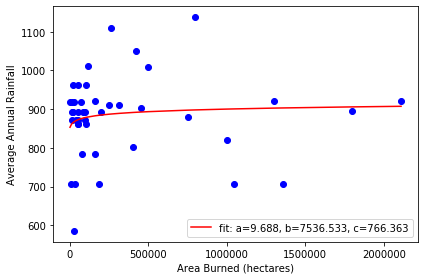

In [67]:
hist_temp_df = hist_temp_df.sort_values("AreaBurned(ha)")
rainfall = hist_temp_df["Avg Annual Rainfall"]
temp = hist_temp_df["Avg Annual Temp"]
x = hist_temp_df["AreaBurned(ha)"]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Area Burned (hectares)")

ax.scatter(x, rainfall, c='b', marker='o')
plt.ylabel("Average Annual Rainfall")

def func(x, a, b, c):
    return a * np.log(b + x) + c

popt, pcov = curve_fit(func, x, rainfall)
plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# scipy.optimize.curve_fit(lambda t,a,b: a+b*numpy.log(t),  x,  rainfall)
# p = np.polyfit(x, np.log(rainfall), 1)
# p = np.poly1d(np.polyfit(x, rainfall, 2))

# ax2=ax.twinx()

# ax2.scatter(x, temp, c='r', marker='^')
# plt.ylabel("Average Annual Temperature")
# p2 = p = np.poly1d(np.polyfit(x, temp, 3))

# xp = np.linspace(np.min(x), np.max(x), 1000)
# _ = plt.plot(x, rainfall, '.', xp, p(xp), '-')

plt.tight_layout()
plt.legend()
plt.show()

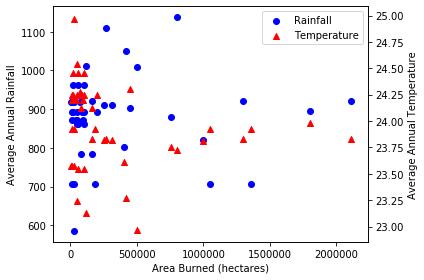

In [74]:
rainfall = hist_temp_df["Avg Annual Rainfall"]
temp = hist_temp_df["Avg Annual Temp"]
x = hist_temp_df["AreaBurned(ha)"]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Area Burned (hectares)")

rain = ax.scatter(x, rainfall, c='b', marker='o', label="Rainfall")
plt.ylabel("Average Annual Rainfall")

ax2=ax.twinx()

temp = ax2.scatter(x, temp, c='r', marker='^', label="Temperature")
plt.ylabel("Average Annual Temperature")

plt.tight_layout()
plt.legend([rain, temp], ("Rainfall", "Temperature"))
plt.savefig("images/rainTempAreaBurned.png")
plt.show()